In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [5]:
import os
import pandas as pd

base_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))

train_path = os.path.join(base_dir, "data", "train.csv")
df_train = pd.read_csv(train_path)

test_path = os.path.join(base_dir, "data", "test.csv")
df_test = pd.read_csv(test_path)


In [8]:
submission_path=os.path.join(base_dir, "data", "sample_submission.csv")
df_target=pd.read_csv(submission_path)


In [9]:
df_target

,index,Depression
0,473,No
1,442,No
2,265,No
3,447,No
4,398,No
...,...,...
96,205,No
97,343,No
98,44,No
99,65,No


In [7]:
df_test

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,index
0,Female,34,1.0,4.0,7-8 hours,Moderate,No,5,1,Yes,473
1,Female,29,3.0,3.0,5-6 hours,Healthy,Yes,10,1,Yes,442
2,Female,32,5.0,4.0,Less than 5 hours,Unhealthy,Yes,0,3,Yes,265
3,Male,21,2.0,4.0,More than 8 hours,Unhealthy,Yes,3,3,Yes,447
4,Female,30,5.0,1.0,Less than 5 hours,Unhealthy,No,9,1,No,398
...,...,...,...,...,...,...,...,...,...,...,...
96,Female,34,3.0,1.0,More than 8 hours,Healthy,Yes,5,4,No,205
97,Female,34,3.0,5.0,More than 8 hours,Moderate,Yes,4,5,No,343
98,Female,24,1.0,3.0,5-6 hours,Moderate,No,3,5,No,44
99,Female,20,1.0,5.0,Less than 5 hours,Healthy,No,8,5,No,65


In [10]:
df_train

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression,index
0,Male,33,2.0,4.0,Less than 5 hours,Unhealthy,Yes,12,4,Yes,Yes,171
1,Female,18,1.0,5.0,Less than 5 hours,Unhealthy,No,11,5,Yes,Yes,236
2,Female,22,1.0,1.0,Less than 5 hours,Healthy,No,2,2,No,No,36
3,Male,28,3.0,2.0,More than 8 hours,Healthy,No,3,1,Yes,No,430
4,Male,29,5.0,3.0,5-6 hours,Healthy,No,11,2,Yes,Yes,146
...,...,...,...,...,...,...,...,...,...,...,...,...
396,Female,21,1.0,4.0,7-8 hours,Healthy,No,8,5,Yes,No,112
397,Female,20,3.0,4.0,More than 8 hours,Unhealthy,Yes,3,4,Yes,Yes,466
398,Female,32,4.0,3.0,Less than 5 hours,Healthy,Yes,11,4,No,Yes,301
399,Female,27,3.0,4.0,5-6 hours,Healthy,No,0,2,No,No,428


In [11]:
df_train.shape

(401, 12)

In [15]:
df_train.select_dtypes('number').columns

Index(['Age', 'Academic Pressure', 'Study Satisfaction', 'Study Hours',
       'Financial Stress', 'index'],
      dtype='object')

In [14]:
df_train.select_dtypes('object').columns

Index(['Gender', 'Sleep Duration', 'Dietary Habits',
       'Have you ever had suicidal thoughts ?',
       'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [17]:
df_train.describe(include='number')

,Age,Academic Pressure,Study Satisfaction,Study Hours,Financial Stress,index
count,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000
mean,26.281796,3.000000,3.089776,6.351621,2.927681,245.122195
std,4.852102,1.371131,1.380913,3.734107,1.416777,145.237848
min,18.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,22.000000,2.000000,2.000000,3.000000,2.000000,121.000000
50%,27.000000,3.000000,3.000000,6.000000,3.000000,243.000000
75%,30.000000,4.000000,4.000000,10.000000,4.000000,370.000000
max,34.000000,5.000000,5.000000,12.000000,5.000000,501.000000


In [18]:
df_train.describe(include='object')

,Gender,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Family History of Mental Illness,Depression
count,401,401,401,401,401,401
unique,2,4,3,2,2,2
top,Male,More than 8 hours,Unhealthy,Yes,No,Yes
freq,209,107,135,208,216,201


In [19]:
df_train.columns

Index(['Gender', 'Age', 'Academic Pressure', 'Study Satisfaction',
       'Sleep Duration', 'Dietary Habits',
       'Have you ever had suicidal thoughts ?', 'Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression',
       'index'],
      dtype='object')

In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 401 non-null    object 
 1   Age                                    401 non-null    int64  
 2   Academic Pressure                      401 non-null    float64
 3   Study Satisfaction                     401 non-null    float64
 4   Sleep Duration                         401 non-null    object 
 5   Dietary Habits                         401 non-null    object 
 6   Have you ever had suicidal thoughts ?  401 non-null    object 
 7   Study Hours                            401 non-null    int64  
 8   Financial Stress                       401 non-null    int64  
 9   Family History of Mental Illness       401 non-null    object 
 10  Depression                             401 non-null    object 
 11  index 

In [21]:
df_train.isnull().sum()


Gender                                   0
Age                                      0
Academic Pressure                        0
Study Satisfaction                       0
Sleep Duration                           0
Dietary Habits                           0
Have you ever had suicidal thoughts ?    0
Study Hours                              0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
index                                    0
dtype: int64

In [22]:
df_train.nunique()


Gender                                     2
Age                                       17
Academic Pressure                          5
Study Satisfaction                         5
Sleep Duration                             4
Dietary Habits                             3
Have you ever had suicidal thoughts ?      2
Study Hours                               13
Financial Stress                           5
Family History of Mental Illness           2
Depression                                 2
index                                    401
dtype: int64

In [ ]:
df_train.duplicated().sum()

np.int64(0)

# Exploratory Data Analysis

In [25]:
df_train

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression,index
0,Male,33,2.0,4.0,Less than 5 hours,Unhealthy,Yes,12,4,Yes,Yes,171
1,Female,18,1.0,5.0,Less than 5 hours,Unhealthy,No,11,5,Yes,Yes,236
2,Female,22,1.0,1.0,Less than 5 hours,Healthy,No,2,2,No,No,36
3,Male,28,3.0,2.0,More than 8 hours,Healthy,No,3,1,Yes,No,430
4,Male,29,5.0,3.0,5-6 hours,Healthy,No,11,2,Yes,Yes,146
...,...,...,...,...,...,...,...,...,...,...,...,...
396,Female,21,1.0,4.0,7-8 hours,Healthy,No,8,5,Yes,No,112
397,Female,20,3.0,4.0,More than 8 hours,Unhealthy,Yes,3,4,Yes,Yes,466
398,Female,32,4.0,3.0,Less than 5 hours,Healthy,Yes,11,4,No,Yes,301
399,Female,27,3.0,4.0,5-6 hours,Healthy,No,0,2,No,No,428


Gender

In [26]:
df_train['Gender'].value_counts()

Gender
Male      209
Female    192
Name: count, dtype: int64

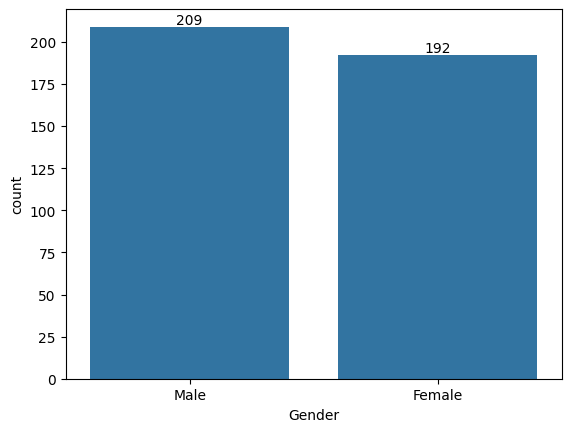

In [28]:
ax=sns.countplot(x=df_train['Gender'])
for bars in ax.containers:
    ax.bar_label(bars)


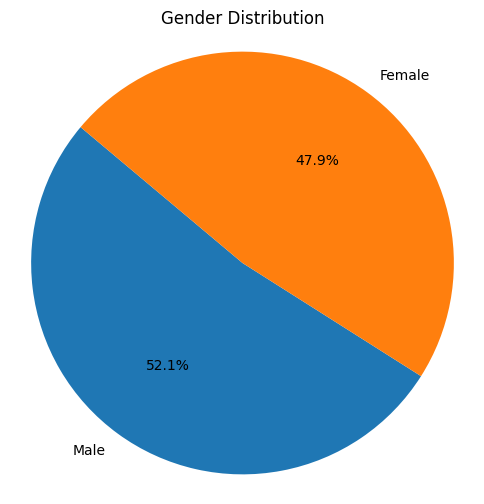

In [29]:
import matplotlib.pyplot as plt

gender_counts = df_train['Gender'].value_counts()

labels = gender_counts.index
sizes = gender_counts.values

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')
plt.axis('equal')  
plt.show()


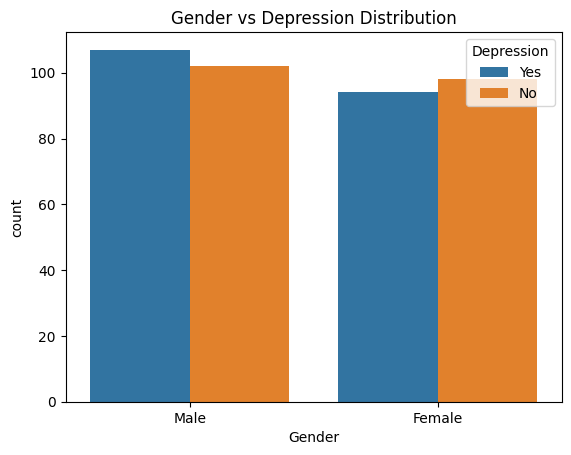

In [31]:
sns.countplot(data=df_train, x='Gender', hue='Depression')
plt.title('Gender vs Depression Distribution')
plt.show()


In [32]:
pd.crosstab(df_train['Gender'], df_train['Depression'], normalize='index') * 100


Depression,No,Yes
Gender,,
Female,51.041667,48.958333
Male,48.803828,51.196172


In [34]:
from scipy.stats import chi2_contingency

contingency = pd.crosstab(df_train['Gender'], df_train['Depression'])
chi2, p, dof, expected = chi2_contingency(contingency)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")


Chi-square statistic: 0.12093701042856829
P-value: 0.728020439894806


✅ Conclusion:

There is no statistically significant relationship between Gender and Depression in this dataset.
In other words, the distribution of Depression is similar across genders.



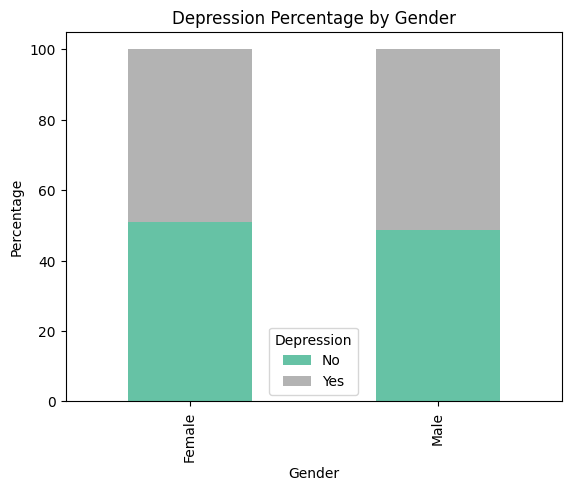

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

norm_ct = pd.crosstab(df_train['Gender'], df_train['Depression'], normalize='index') * 100
norm_ct.plot(kind='bar', stacked=True, colormap='Set2')
plt.ylabel('Percentage')
plt.title('Depression Percentage by Gender')
plt.legend(title='Depression')
plt.show()


<Axes: xlabel='Gender', ylabel='Academic Pressure'>

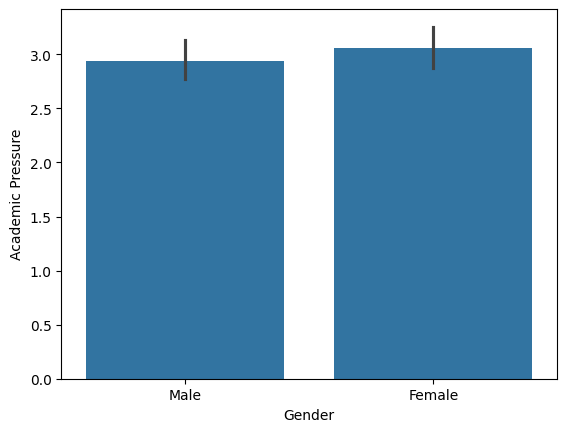

In [37]:
sns.barplot(data=df_train,x='Gender',y='Academic Pressure')

Depression

In [40]:
df_train['Depression'].value_counts()

Depression
Yes    201
No     200
Name: count, dtype: int64

<Axes: xlabel='Depression', ylabel='count'>

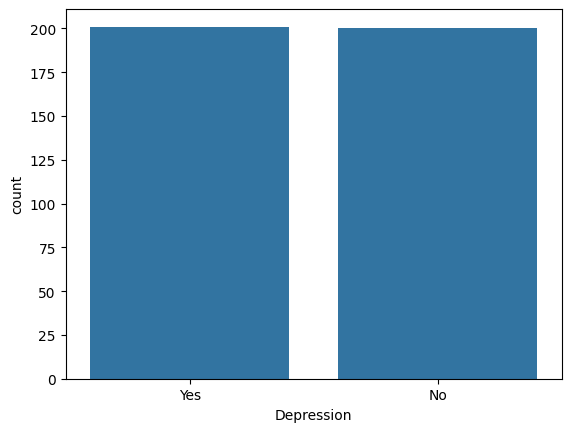

In [41]:
sns.countplot(x=df_train['Depression'])